<a href="https://colab.research.google.com/github/DhruboDevPramanik/Deep-Learning/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Perceptron by Functions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
link ="https://raw.githubusercontent.com/campusx-official/100-days-of-deep-learning/refs/heads/main/day3/placement.csv"
df=pd.read_csv(link)

In [ ]:
print(df.shape)
df.head()

(100, 3)


,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


<Axes: xlabel='cgpa', ylabel='resume_score'>

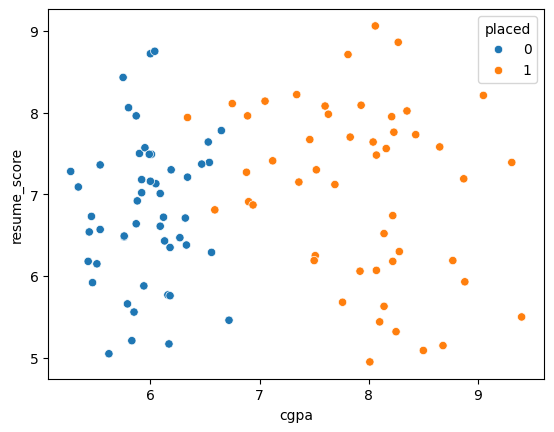

In [ ]:
sns.scatterplot(x=df['cgpa'],y=df['resume_score'],hue=df['placed'])

In [ ]:
x=df.drop("placed",axis=1)
y=df["placed"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import Perceptron
p=Perceptron()
p.fit(x_train,y_train)

Perceptron()

In [ ]:
p.score(x_train,y_train)

0.7375

In [ ]:
p.coef_

array([[ 44.42, -41.1 ]])

In [ ]:
p.intercept_

array([-47.])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

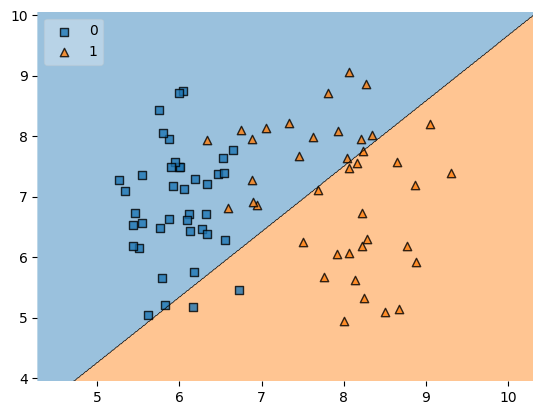

In [ ]:
from mlxtend.plotting import plot_decision_regions as pdr
pdr(x_train.values,y_train.values,p,legend=2)

## perceptron by Jugaru

In [ ]:
link ="https://raw.githubusercontent.com/campusx-official/100-days-of-deep-learning/refs/heads/main/day3/placement.csv"
df=pd.read_csv(link)

In [ ]:
x=df.drop("placed",axis=1)
y=df["placed"]

In [ ]:
def perceptron(x,y):
    X = x.to_numpy()
    x = np.insert(X,0,1,axis=1)
    weights = np.ones(3)
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(x[j],weights))
        weights = weights + lr*(y[j]-y_hat)*x[j]

    return weights[0],weights[1:]

In [ ]:
def step(z):
    return 1 if z>0 else 0

In [ ]:
intercept_,coef_ = perceptron(x,y)

In [ ]:
print(coef_)
print(intercept_)

[ 3.865 -3.703]
-2.800000000000001


In [ ]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [ ]:
x_input = np.linspace(5,10,100)
y_input = m*x_input + b

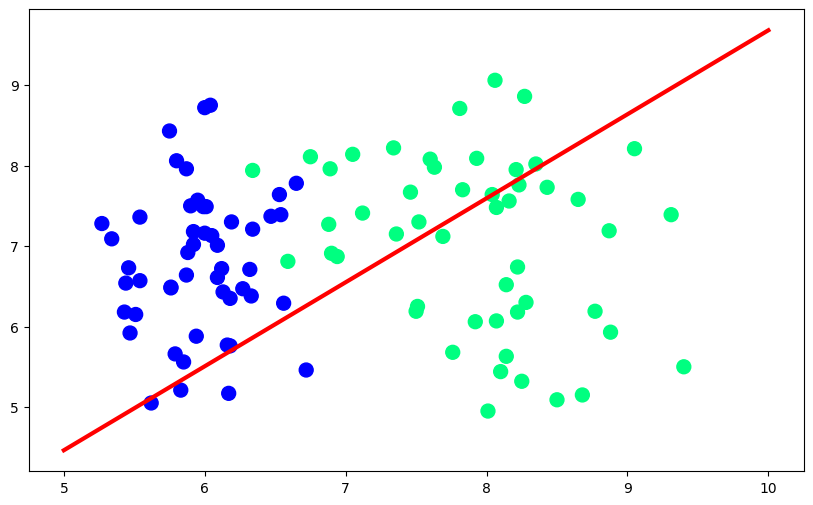

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x['cgpa'],x['resume_score'],c=y,cmap='winter',s=100)




## Perceptron by loss function:




In [ ]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=15)

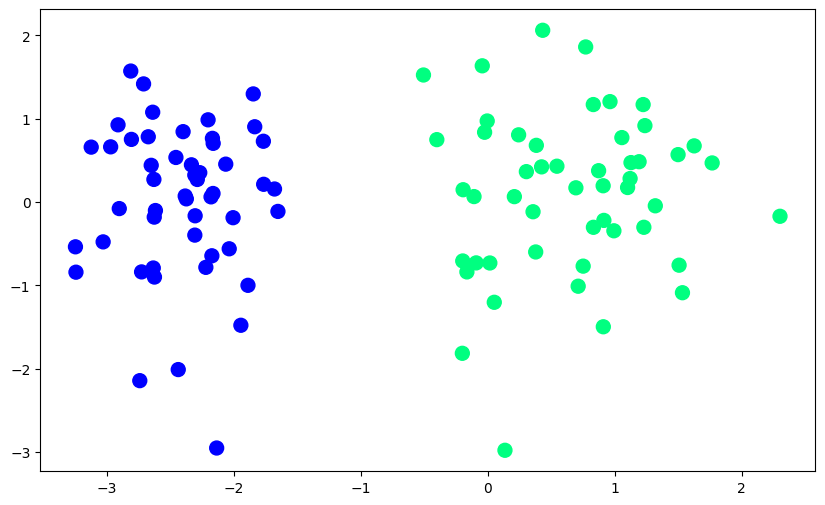

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [ ]:
def perceptron(X,y):

    w1=w2=b=1
    lr = 0.1

    for j in range(1000):

        for i in range(X.shape[0]):

            # check condition
            z = w1*X[i][0] + w2*X[i][1] + b

            if z*y[i] < 0:
                w1 = w1 + lr*y[i]*X[i][0]
                w2 = w2 + lr*y[i]*X[i][1]
                b = b + lr*y[i]

    return w1,w2,b


In [ ]:

w1,w2,b = perceptron(X,y)

In [ ]:
m = -(w1/w2)
c = -(b/w2)

print(m,c)

-4.531321834268464 -5.851870329508209


(-3.0, 2.0)

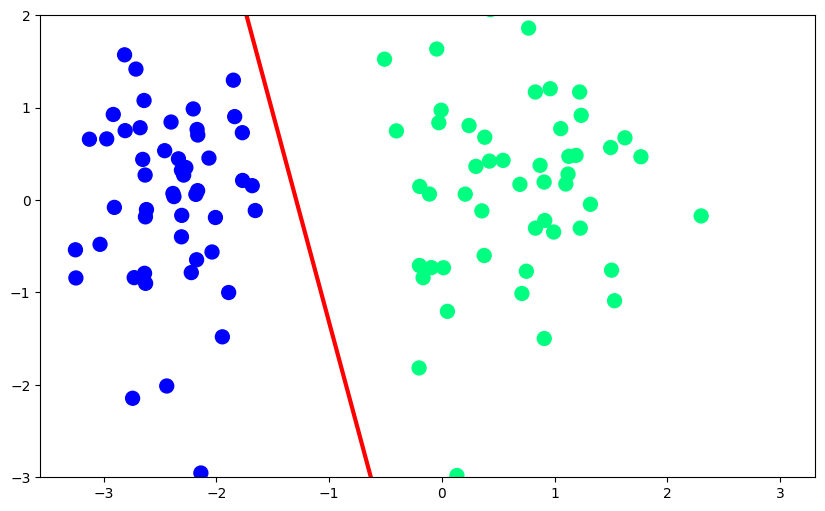

In [ ]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)